In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

print("Files inside DF folder:")
os.listdir("/content/drive/MyDrive/DF")

Files inside DF folder:


['digital_habits_vs_mental_health.csv',
 'mental_health_social_media_posts.csv',
 'Mental_Health_and_Social_Media_Balance_Dataset.csv']

In [3]:
import pandas as pd
path3 = "/content/drive/MyDrive/DF/mental_health_social_media_posts.csv"

try:
    df3 = pd.read_csv(path3, low_memory=False)
    loader3 = "utf-8"
except:
    df3 = pd.read_csv(path3, encoding="latin1", low_memory=False)
    loader3 = "latin1"

print("Loaded using:", loader3)
print("Shape:", df3.shape)
print("Columns:", df3.columns.tolist())
display(df3.head(10))

Loaded using: utf-8
Shape: (1000, 5)
Columns: ['id', 'user_id', 'post_content', 'tag', 'timestamp']


,id,user_id,post_content,tag,timestamp
0,1,user_6377,I'm feeling so low today. Nothing seems to mat...,Depression,2025-02-03 22:05:12
1,2,user_8925,Every day feels like a struggle to get out of ...,Depression,2024-10-28 12:04:56
2,3,user_5035,"The pain is unbearable, and I'm tired of fight...",Suicidal,2025-02-11 01:26:59
3,4,user_2509,Sometimes I feel like it would be easier if I ...,Suicidal,2024-08-29 06:23:06
4,5,user_6281,I feel overwhelmed with sadness and despair. R...,Depression,2024-12-18 07:19:45
5,6,user_9675,Every day feels like a struggle to get out of ...,Depression,2025-03-14 04:35:02
6,7,user_2400,I feel overwhelmed with sadness and despair. R...,Depression,2025-03-22 09:11:57
7,8,user_7292,"The pain is unbearable, and I'm tired of fight...",Suicidal,2024-08-19 00:28:02
8,9,user_7748,I feel overwhelmed with sadness and despair. R...,Depression,2025-07-23 23:10:32
9,10,user_4351,"The pain is unbearable, and I'm tired of fight...",Suicidal,2024-12-19 20:21:09


In [4]:
import pandas as pd

src = "/content/drive/MyDrive/DF/mental_health_social_media_posts.csv"
df = pd.read_csv(src, low_memory=False, encoding='utf-8')

print("Original shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\n tag value counts (top 30)")
print(df['tag'].value_counts().head(30))

print("\n Unique tags sample (up to 50) ")
print(df['tag'].dropna().unique()[:50])

df['timestamp_parsed'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['year'] = df['timestamp_parsed'].dt.year.astype('Int64')
df['month'] = df['timestamp_parsed'].dt.month.astype('Int64')
df['day'] = df['timestamp_parsed'].dt.day.astype('Int64')

total = len(df)
parsed = df['timestamp_parsed'].notna().sum()
print(f"\nTimestamps parsed: {parsed} / {total}")

print("\n Year value counts (top 10) ")
print(df['year'].value_counts().head(20))

print("\n Sample rows (first 10) ")
display(df[['id','user_id','post_content','tag','timestamp','timestamp_parsed','year']].head(10))

print("\nMissing counts for important cols:")
print(df[['post_content','tag','timestamp','timestamp_parsed','year']].isna().sum())

out = "/content/clean_mental_posts.csv"
df.to_csv(out, index=False)
print("\nSaved cleaned file to:", out)

Original shape: (1000, 5)

Columns: ['id', 'user_id', 'post_content', 'tag', 'timestamp']

 tag value counts (top 30)
tag
Suicidal      342
Depression    330
Anxiety       328
Name: count, dtype: int64

 Unique tags sample (up to 50) 
['Depression' 'Suicidal' 'Anxiety']

Timestamps parsed: 1000 / 1000

 Year value counts (top 10) 
year
2025    570
2024    430
Name: count, dtype: Int64

 Sample rows (first 10) 


,id,user_id,post_content,tag,timestamp,timestamp_parsed,year
0,1,user_6377,I'm feeling so low today. Nothing seems to mat...,Depression,2025-02-03 22:05:12,2025-02-03 22:05:12,2025
1,2,user_8925,Every day feels like a struggle to get out of ...,Depression,2024-10-28 12:04:56,2024-10-28 12:04:56,2024
2,3,user_5035,"The pain is unbearable, and I'm tired of fight...",Suicidal,2025-02-11 01:26:59,2025-02-11 01:26:59,2025
3,4,user_2509,Sometimes I feel like it would be easier if I ...,Suicidal,2024-08-29 06:23:06,2024-08-29 06:23:06,2024
4,5,user_6281,I feel overwhelmed with sadness and despair. R...,Depression,2024-12-18 07:19:45,2024-12-18 07:19:45,2024
5,6,user_9675,Every day feels like a struggle to get out of ...,Depression,2025-03-14 04:35:02,2025-03-14 04:35:02,2025
6,7,user_2400,I feel overwhelmed with sadness and despair. R...,Depression,2025-03-22 09:11:57,2025-03-22 09:11:57,2025
7,8,user_7292,"The pain is unbearable, and I'm tired of fight...",Suicidal,2024-08-19 00:28:02,2024-08-19 00:28:02,2024
8,9,user_7748,I feel overwhelmed with sadness and despair. R...,Depression,2025-07-23 23:10:32,2025-07-23 23:10:32,2025
9,10,user_4351,"The pain is unbearable, and I'm tired of fight...",Suicidal,2024-12-19 20:21:09,2024-12-19 20:21:09,2024



Missing counts for important cols:
post_content        0
tag                 0
timestamp           0
timestamp_parsed    0
year                0
dtype: int64

Saved cleaned file to: /content/clean_mental_posts.csv


In [5]:

!pip install -q transformers torch sentencepiece tqdm

import os
import pandas as pd
from tqdm.auto import tqdm
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

INPUT_PATH = "/content/clean_mental_posts.csv"
OUTPUT_PATH = "/content/clean_mental_posts_with_sentiment.csv"

df = pd.read_csv(INPUT_PATH, low_memory=False)
print("Loaded rows:", len(df))
print("Sample columns:", df.columns.tolist())

MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"
label_map = {0: "negative", 1: "neutral", 2: "positive"}

device = 0 if torch.cuda.is_available() else -1
print("Using device:", "cuda" if device==0 else "cpu")

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

sentiment_pipe = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device, function_to_apply=None)

texts = df['post_content'].astype(str).tolist()
batch_size = 32
preds = []
scores = []

for i in tqdm(range(0, len(texts), batch_size), desc="Predicting"):
    batch_texts = texts[i:i+batch_size]
    outputs = sentiment_pipe(batch_texts)

    for out in outputs:
        lab = out['label']

        if lab.startswith("LABEL_"):
            idx = int(lab.split("_")[1])
            label = label_map.get(idx, lab)
        else:

            label = lab.lower()
        preds.append(label)
        scores.append(float(out.get('score', 0.0)))

df['sentiment'] = preds
df['sentiment_score'] = scores

df.to_csv(OUTPUT_PATH, index=False)
print("Saved with sentiment to:", OUTPUT_PATH)

print("\nOverall sentiment counts:")
print(df['sentiment'].value_counts())

print("\nSentiment by tag (top):")
print(pd.crosstab(df['tag'], df['sentiment']))

print("\nSentiment by year (top):")
print(pd.crosstab(df['year'], df['sentiment']))

display(df[['id','post_content','tag','timestamp','year','sentiment','sentiment_score']].head(10))

Loaded rows: 1000
Sample columns: ['id', 'user_id', 'post_content', 'tag', 'timestamp', 'timestamp_parsed', 'year', 'month', 'day']
Using device: cpu


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cpu


Predicting:   0%|          | 0/32 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Saved with sentiment to: /content/clean_mental_posts_with_sentiment.csv

Overall sentiment counts:
sentiment
negative    930
neutral      70
Name: count, dtype: int64

Sentiment by tag (top):
sentiment   negative  neutral
tag                          
Anxiety          328        0
Depression       330        0
Suicidal         272       70

Sentiment by year (top):
sentiment  negative  neutral
year                        
2024            398       32
2025            532       38


,id,post_content,tag,timestamp,year,sentiment,sentiment_score
0,1,I'm feeling so low today. Nothing seems to mat...,Depression,2025-02-03 22:05:12,2025,negative,0.958663
1,2,Every day feels like a struggle to get out of ...,Depression,2024-10-28 12:04:56,2024,negative,0.853436
2,3,"The pain is unbearable, and I'm tired of fight...",Suicidal,2025-02-11 01:26:59,2025,negative,0.971295
3,4,Sometimes I feel like it would be easier if I ...,Suicidal,2024-08-29 06:23:06,2024,negative,0.514909
4,5,I feel overwhelmed with sadness and despair. R...,Depression,2024-12-18 07:19:45,2024,negative,0.956340
5,6,Every day feels like a struggle to get out of ...,Depression,2025-03-14 04:35:02,2025,negative,0.853436
6,7,I feel overwhelmed with sadness and despair. R...,Depression,2025-03-22 09:11:57,2025,negative,0.956340
7,8,"The pain is unbearable, and I'm tired of fight...",Suicidal,2024-08-19 00:28:02,2024,negative,0.969520
8,9,I feel overwhelmed with sadness and despair. R...,Depression,2025-07-23 23:10:32,2025,negative,0.956340
9,10,"The pain is unbearable, and I'm tired of fight...",Suicidal,2024-12-19 20:21:09,2024,negative,0.969520


/tmp/ipython-input-1441257554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='magma')


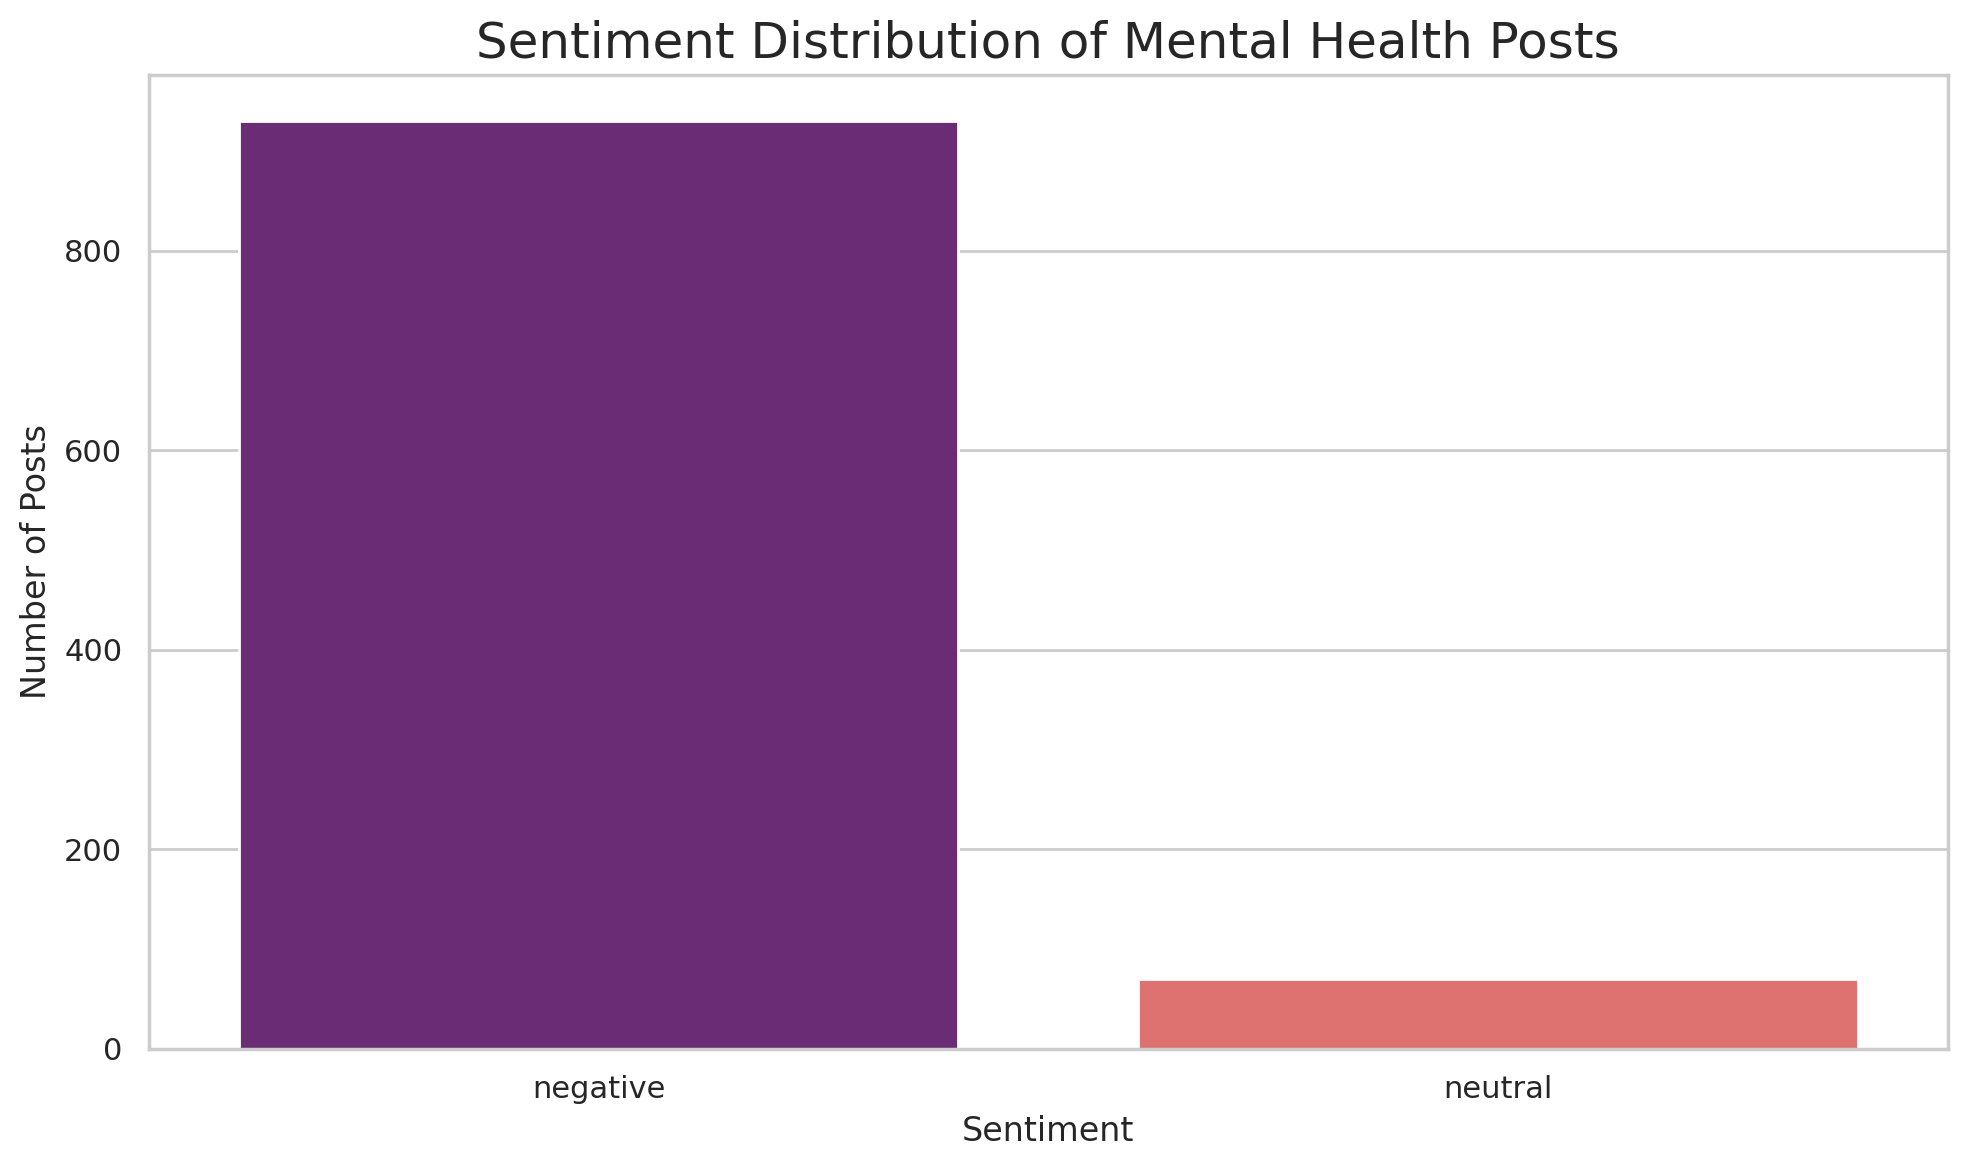

/tmp/ipython-input-1441257554.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tag', palette='viridis')


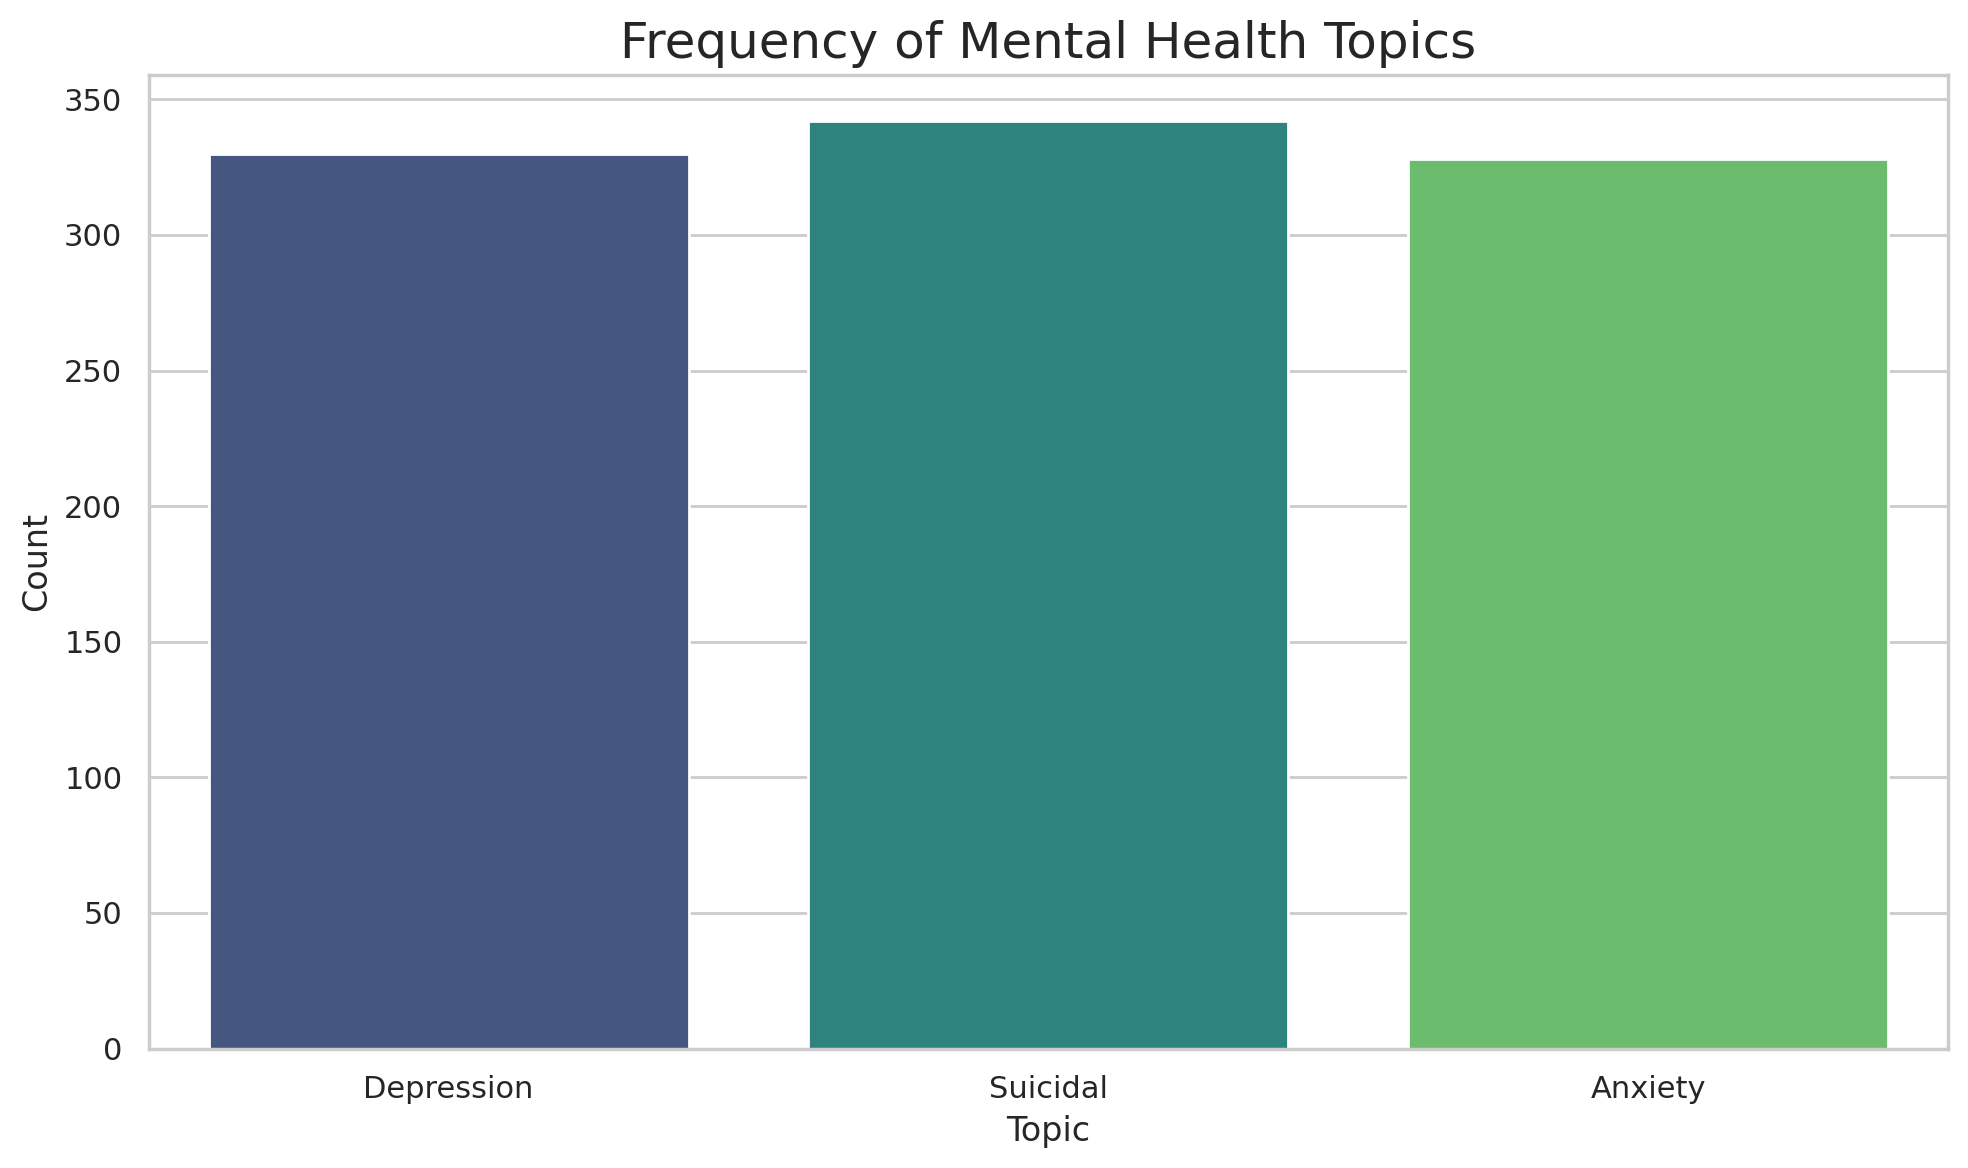

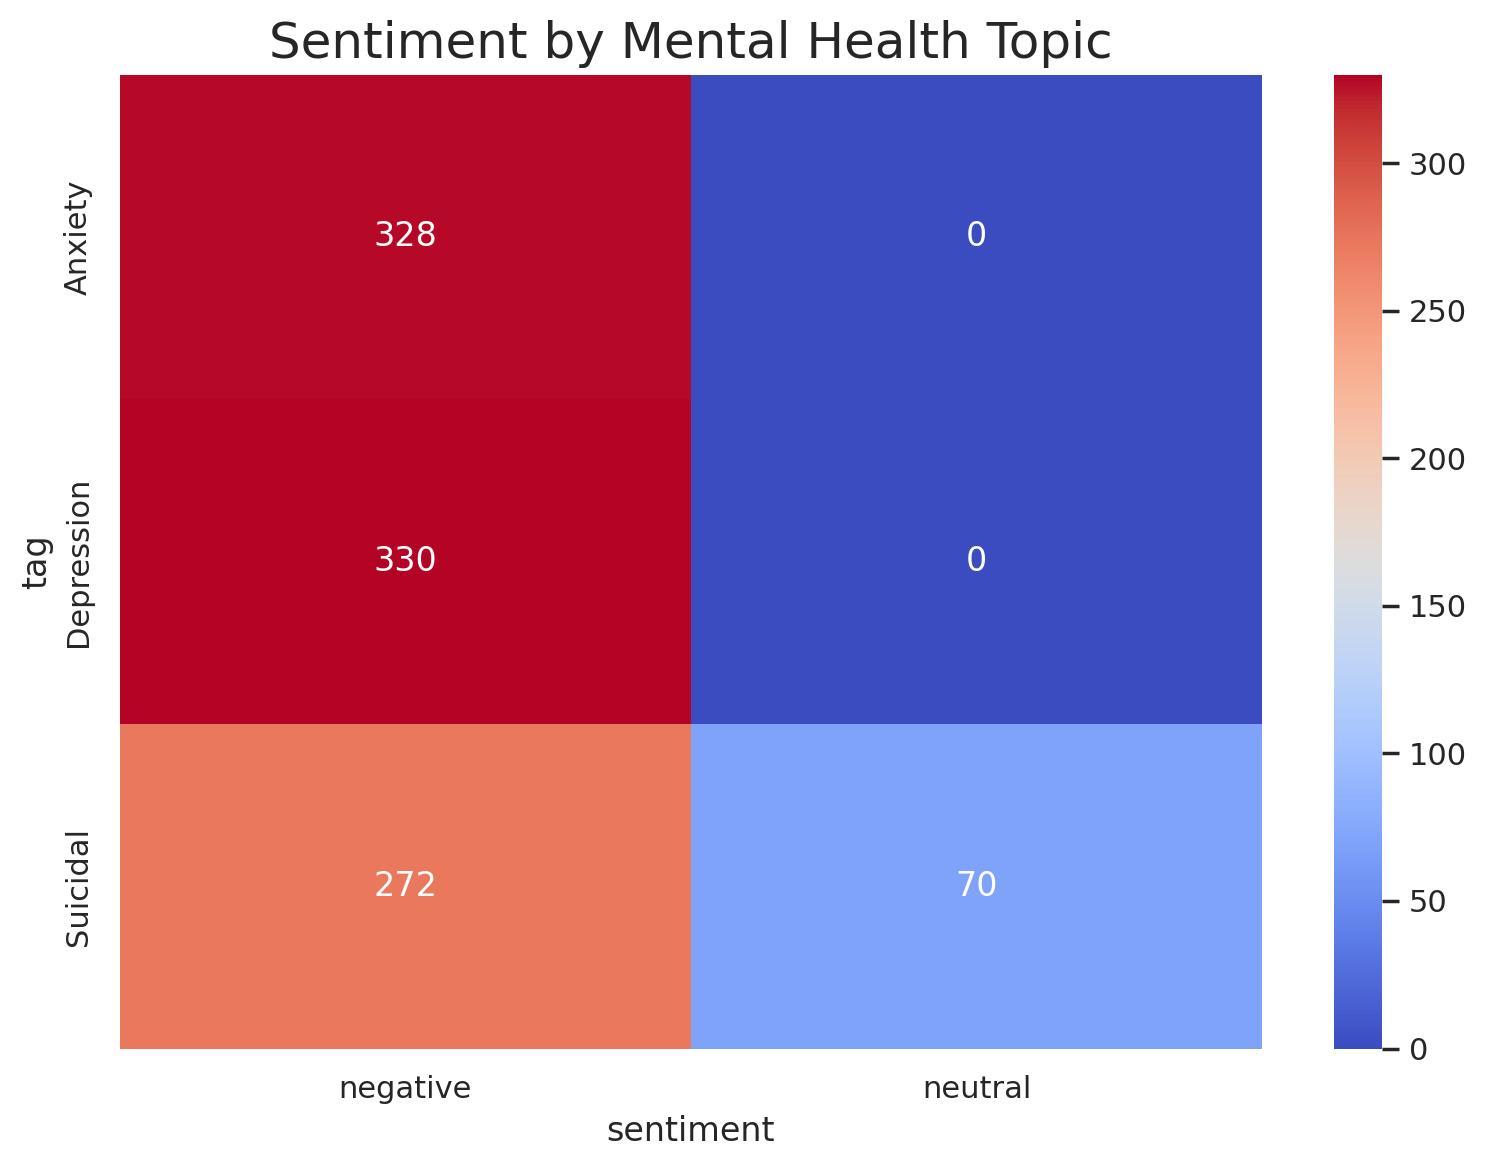

<Figure size 2000x1200 with 0 Axes>

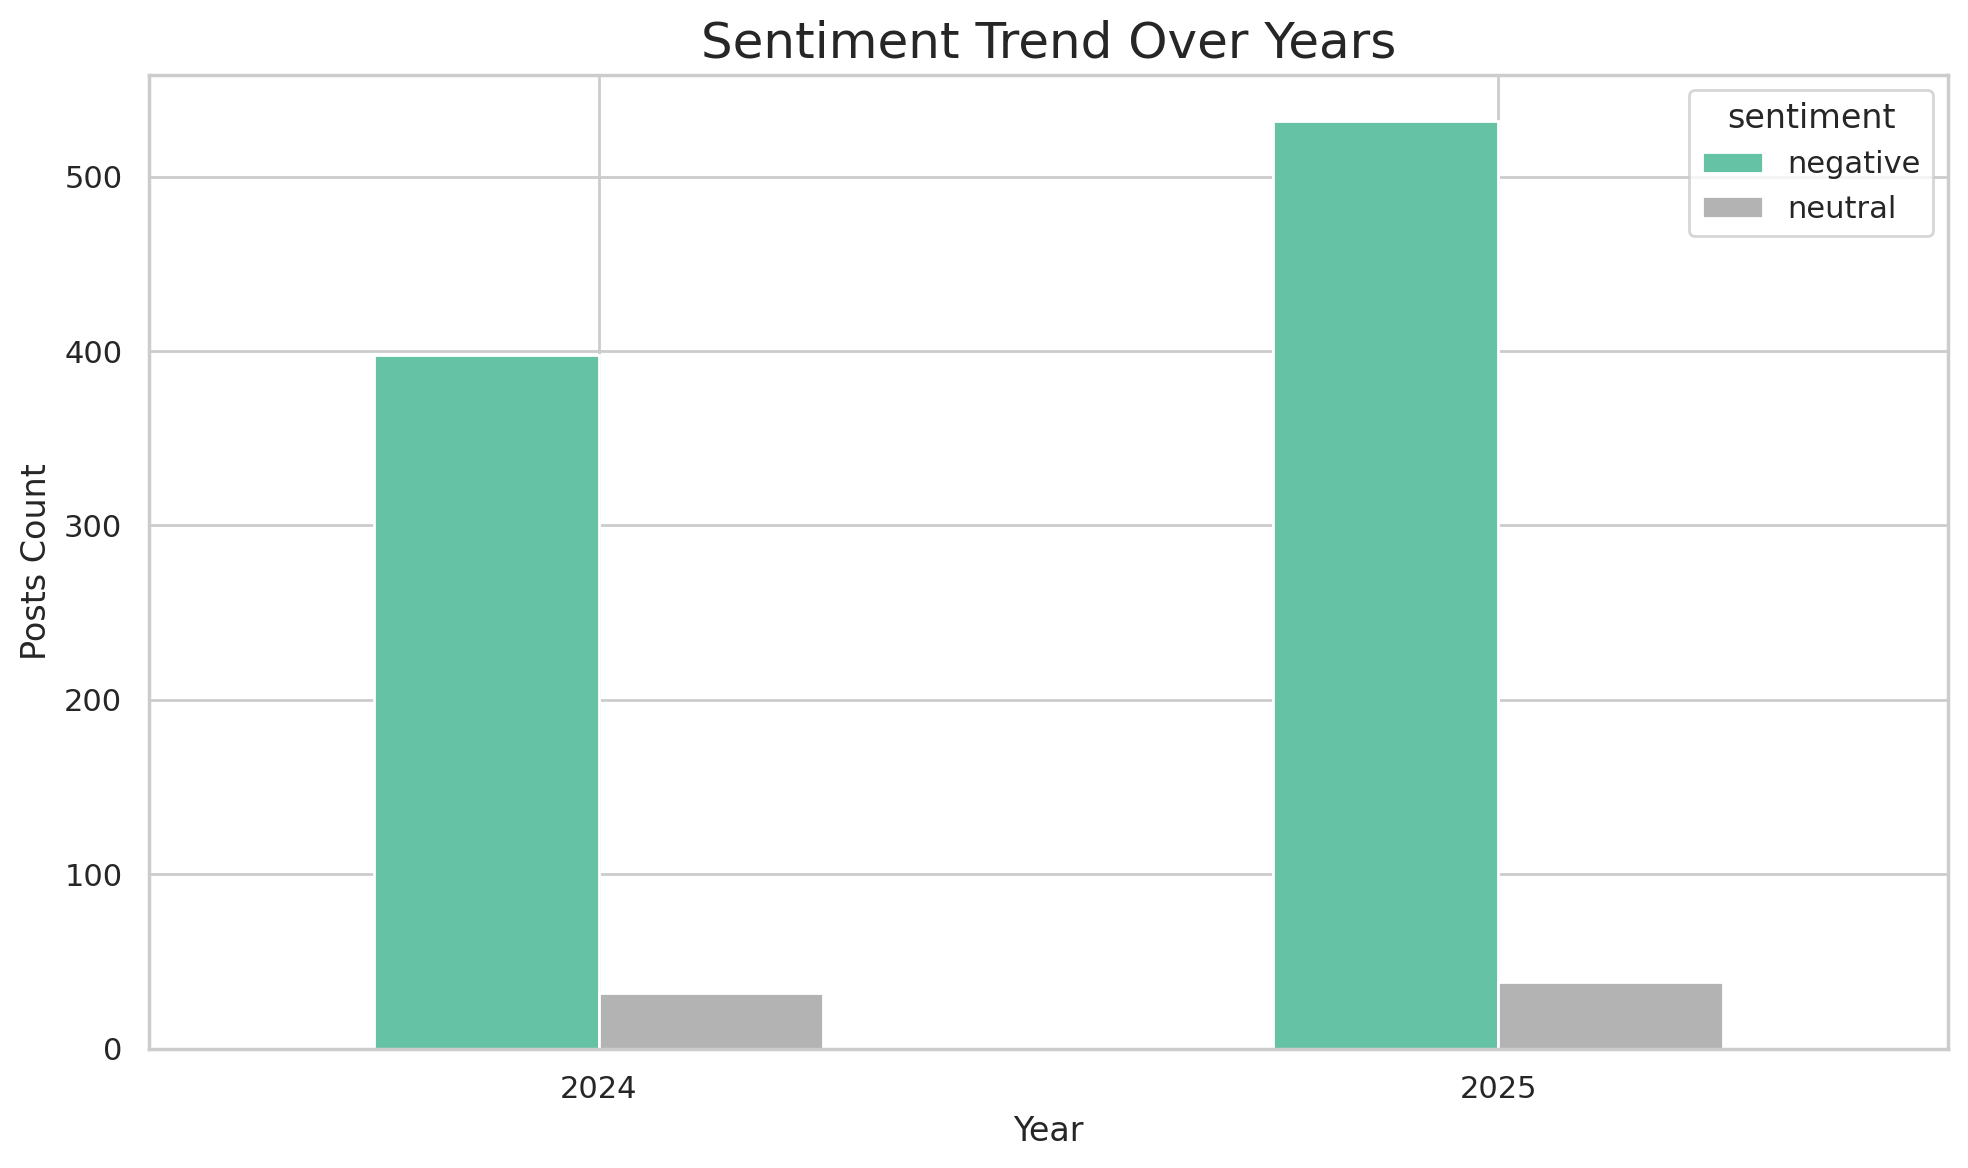

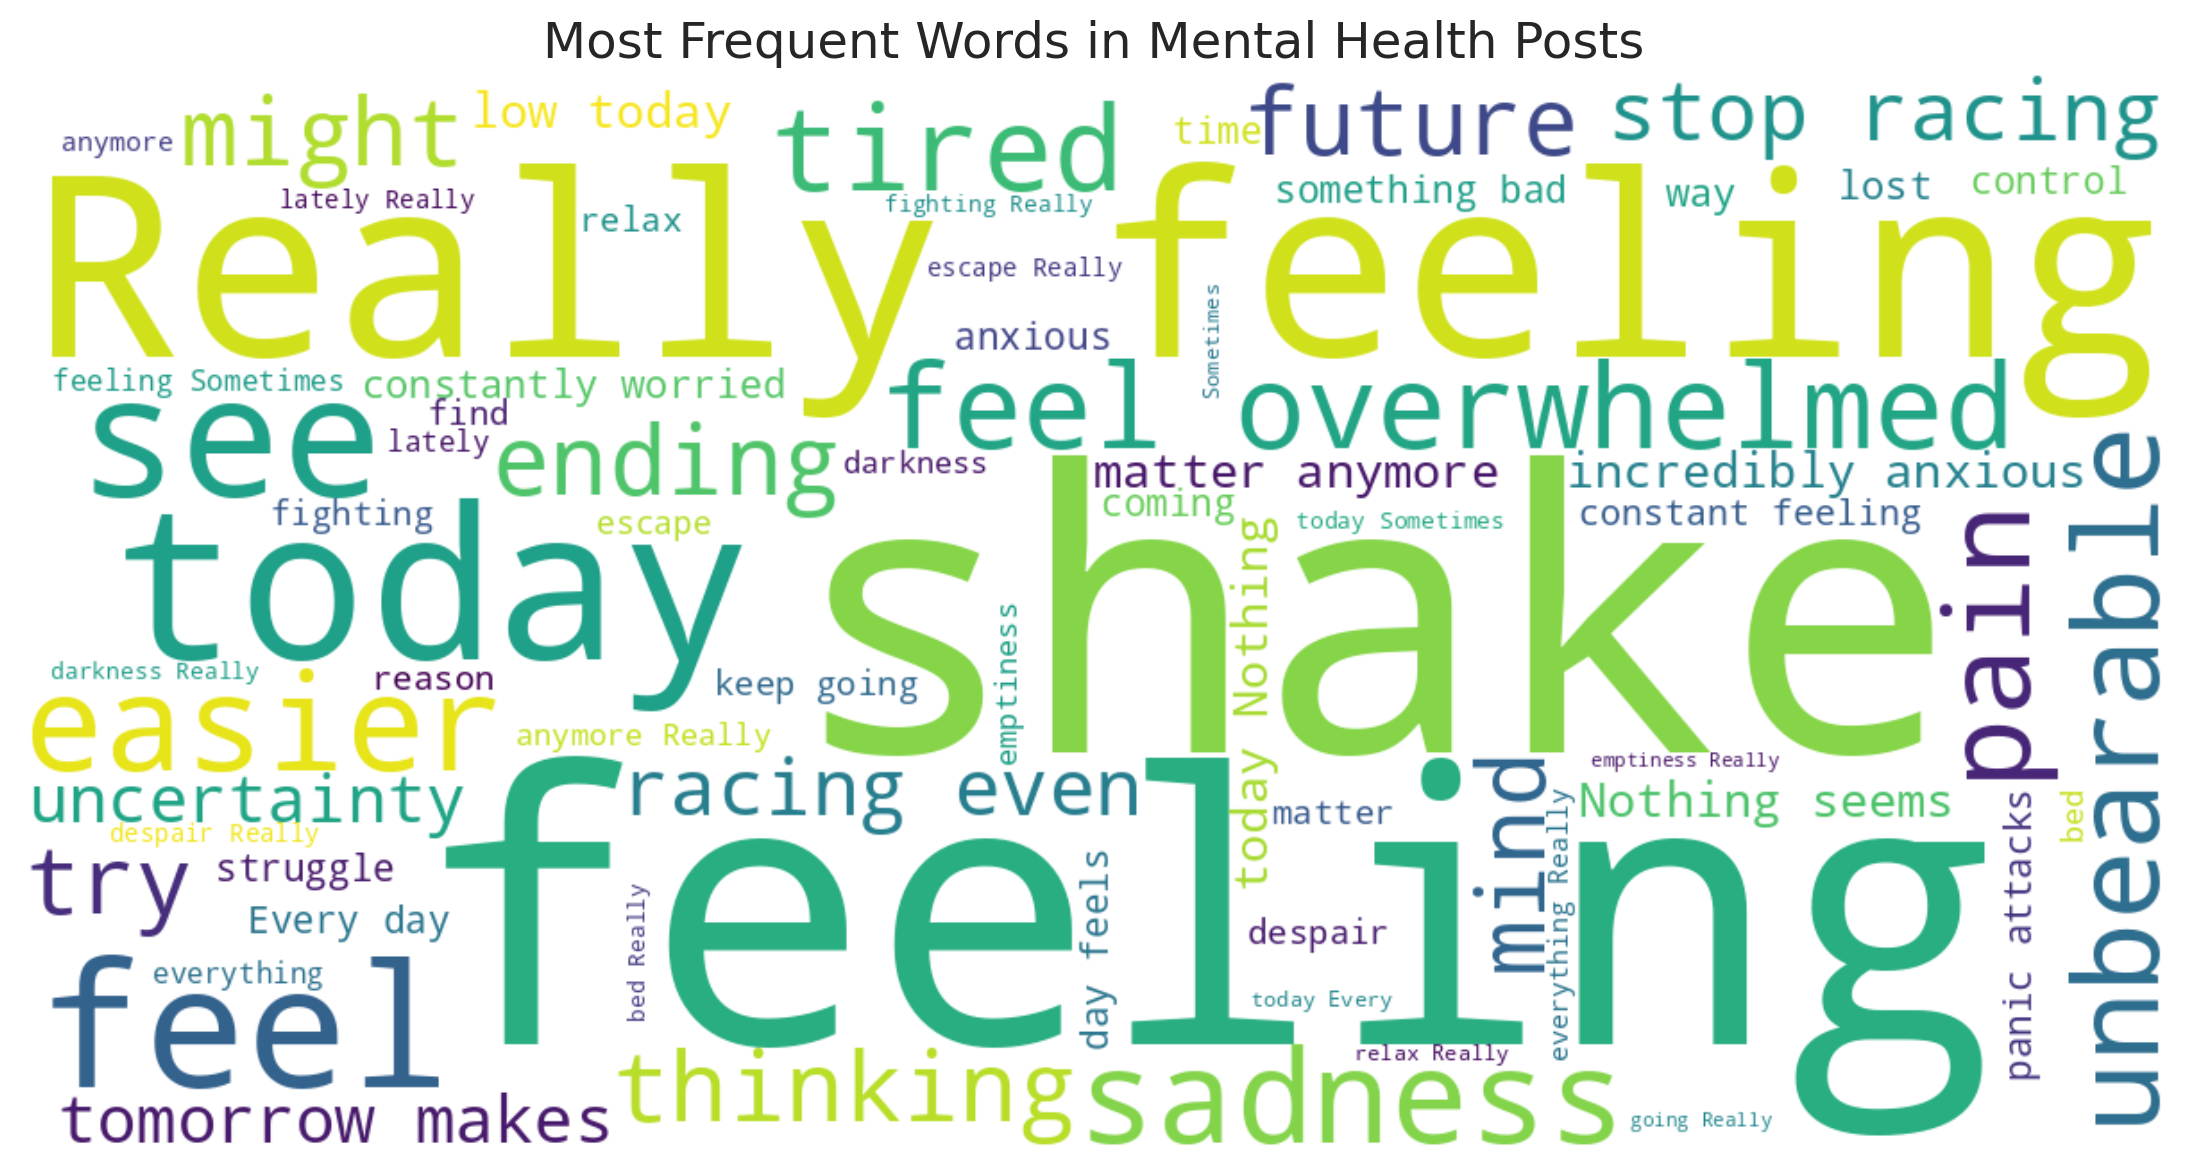

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("/content/clean_mental_posts_with_sentiment.csv")

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 200

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentiment', palette='magma')
plt.title("Sentiment Distribution of Mental Health Posts", fontsize=18)
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.savefig("/content/sentimentdistribution.png")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='tag', palette='viridis')
plt.title("Frequency of Mental Health Topics", fontsize=18)
plt.xlabel("Topic")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("/content/topicfrequency.png")
plt.show()

pivot = pd.crosstab(df['tag'], df['sentiment'])
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='d')
plt.title("Sentiment by Mental Health Topic", fontsize=18)
plt.tight_layout()
plt.savefig("/content/sentimentbytag.png")
plt.show()

year_pivot = pd.crosstab(df['year'], df['sentiment'])
plt.figure(figsize=(10,6))
year_pivot.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Sentiment Trend Over Years", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Posts Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("/content/yearlysentimenttrend.png")
plt.show()

text = " ".join(df['post_content'].astype(str).tolist())
wc = WordCloud(width=1200, height=600, background_color="white").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Mental Health Posts", fontsize=18)
plt.tight_layout()
plt.savefig("/content/wordcloud.png")
plt.show()
